# Load MNIST Data 

In [1]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read csv file.   
d0 = pd.read_csv('C:\\VipinML\\InputData\\mnist_train.csv')

# show top  5 rows with header, total of 784 pixels for each row, that is 28*28 pixels.
print(d0.head(5)) # print first five rows of d0.

# take column 1 label into new var.
# save the labels into a variable l.
l = d0['label']

# remove label from data.
# Drop the label feature and store the pixel data in d. creating a new var D and drop label from D.
d = d0.drop("label",axis=1)
 


   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [2]:
# 60K rows and 784 columns.
print(d.shape)

# only 1 colum and 60K rows.
print(l.shape)


(60000, 784)
(60000,)


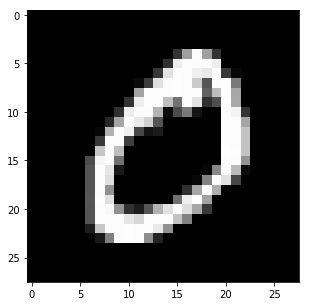

In [3]:
# display or plot a number.
# used for drawing a  pic,
plt.figure(figsize=(5,5))
idx = 1
# get the data of 100th row from 'd' and convert it to maxrix 28*28. 
grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array

plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()
# get data from label to see if image shows same number as stored into label.


#  2D Visualization using PCA 

In [4]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.
# PCA always convert to 2D for realization or sometimes more.. Simplest technique. Used for Visualization . Choose features that have higher spread, 
#incase to drop features for dim reduction. If selected feature has higer spread, see if rotating to axis will reduce spread. 
# taking smaller set , just 15K rows.

labels = l.head(15000)
data = d.head(15000)
# 15 rows, 784 clms
print("the shape of sample data = ", data.shape)


the shape of sample data =  (15000, 784)


In [5]:
# Data-preprocessing: Standardizing the data
# (take each clm of the data and substract from mean)/std dev , this is what we are doing here as part of preprocessing. 
# (x-u)/std dev
# learn standard scaler.
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
# just to be sure nothing broken.
print(standardized_data.shape)


(15000, 784)


In [6]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy , transpose matrix with sample data. AT * A
# covariance matrix.
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of covariance matrix = ", covar_matrix.shape)


The shape of covariance matrix =  (784, 784)


In [7]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.
# to get eigen vector and eign value.
from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigen values since in ascending order. 
# I am taking 2 top eigen values since I am converting to 2D.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
# just doing transpose, so shape will be switched. 
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [8]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
# just to get 2D, I need 2 top eigen vectors. 
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [9]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


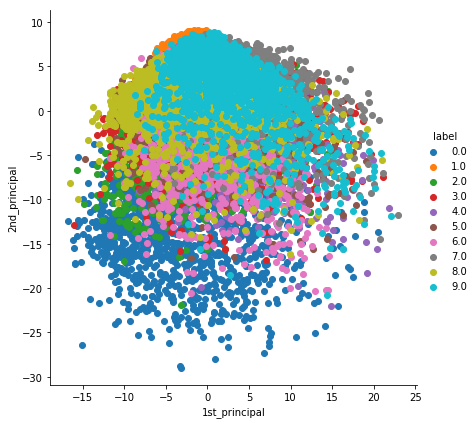

In [10]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [11]:
# initializing the pca
# what we did above, we do not need to do all the work. same thing is done below by using simple fucntion. 
# PCA preserves global structure of data. tsne preserves local structure.
from sklearn import decomposition
pca = decomposition.PCA()


In [12]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2  # since we  redcuce to 2D. entoire work is done where what we did above.
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (15000, 2)


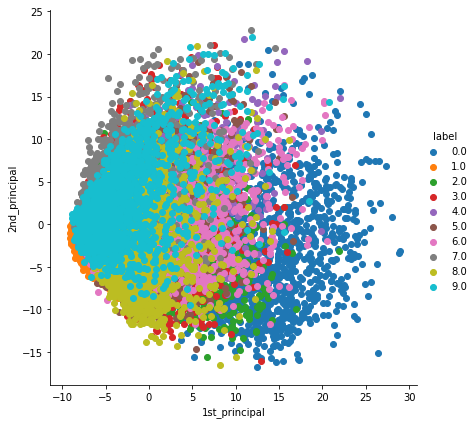

In [13]:
# attaching the label for each 2-d data point 
# added third column  - label as well.
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

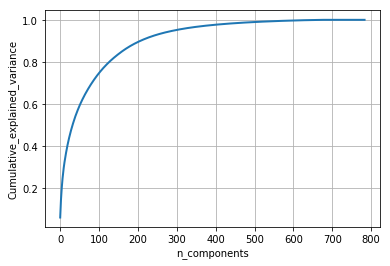

In [14]:
# PCA for dimensionality redcution (non-visualization)

# going from 784 to 784 D.
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
# devide variance/sim of variance to see how much %wise variance is explained. 
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined. below graph shows how much % variance is explained. 

# t-SNE using Scikit-Learn

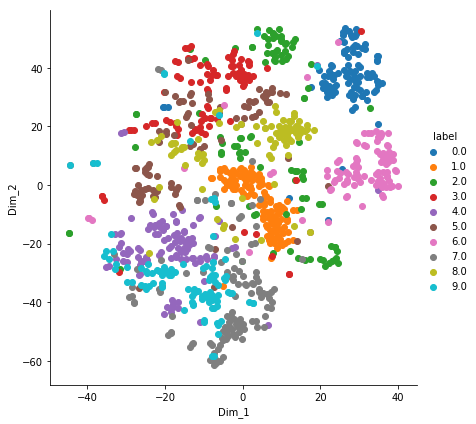

In [15]:
# TSNE
# Embedding: - Picking a point from high dim space and mapping it into a low dim space. tSNE preserves distance of the 
# local points/features.  points which are farther away, tSNE will not guarantee to preserve the distance. 
# but tSNE will surely preserve nearer distance among points.
# Crowding Problem: We cannot perfectly embed all the nearer points as we earlier mentioned =, tSNE should preserve distance
# of local points in 1 D space. Sometime issue comes when we map all nearer points to local space 
# from multiple dim to one dim space. 
# T-Distribution is used to resolve crowding problem, but not always to solve crowding problem.
# Refer https://distll.pub or tSNE, tSNE is iterative algorithm. at each state, it tries to find the space to put points in space. 
# Which is called embedding. so, we use step size - number of iteration.at each iteration it tries to find better place for points.
# We should keep iterating until shape is stable.
# Perplexity:  number of neighbors - if I want to preserve distances of my 5 points, so my perplexity will be 5. so
# perplexity says how many data points do I need to preserve. perplexity very low and very high might not work.
# make sure you keep trying changing to see if your data is stable.so always run tSNE 
# with different parameters to see if your shape is stable. running same data might give you diff result since tSNE behaves randomly.
# tSNE expands dense cultures and shrinks sparse clusters. Drawback of tSNE.
# tSNE does not preserve distances among clusters as well.

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points. Take more data for testing purpose and anayse the plot.
data_1000 = standardized_data[0:30000]
labels_1000 = labels[0:30000]

model = TSNE(n_components=2, random_state=0) # random state tell if TSNE to consider random behaviour at the time of generating graph.
# configuring the parameteres
# the number of components = 2, sicne dimension is 2.
# default perplexity = 30, very imp parameter.
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

# creating a new data frame which help us in ploting the result data T -> transpose.
tsne_data = np.vstack((tsne_data.T, labels_1000)).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

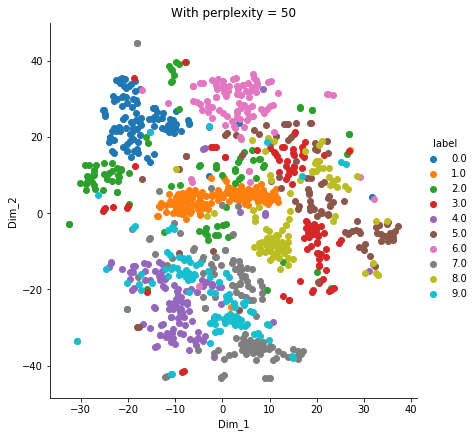

In [16]:
# tSNE will  grop visualy simialar data together. 
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

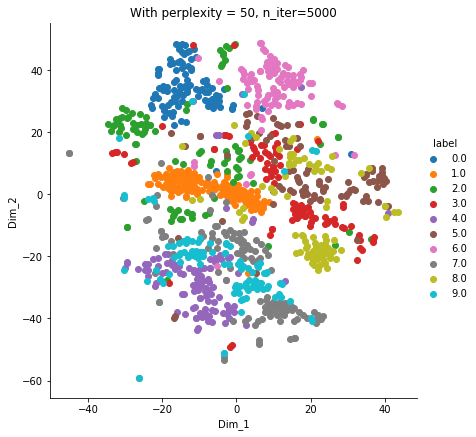

In [17]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

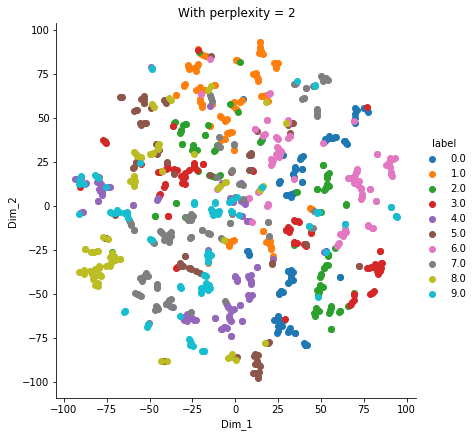

In [18]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

In [19]:
#Excercise: Run the same analysis using 42K points with various 
#values of perplexity and iterations.

# If you use all of the points, you can expect plots like this blog below:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/